In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **importing dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/employee-attrition/employee-attrition.csv')

In [ ]:
df.shape

(1470, 35)

**Observation:** data has 1470 rows and 35 columns

**finding categorical asn numerical columns**

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Clearly there are some categorical columns and some numeric columns

In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
print(cat_cols)
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
print(num_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Handling null values


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Observation:**
There are no null values!!!

### Handling duplicates

In [ ]:
df.duplicated().sum()

0

**Observation:**
There are no duplicated as well

### Studying individual columns
**Age**

Let's first see distribution of age in the company

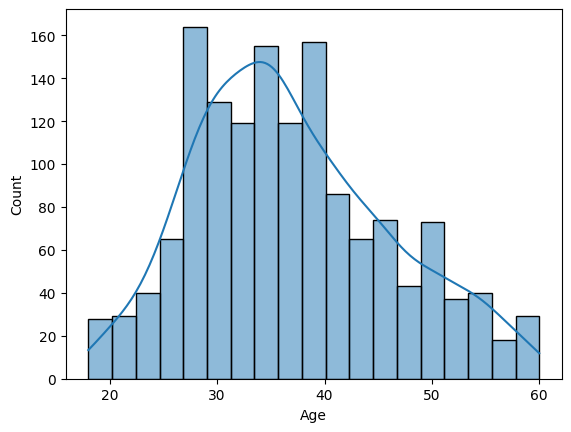

In [ ]:
sns.histplot(data = df, x = 'Age', kde = True)
plt.show()

**Observation:** Age seems reasaonably distributed

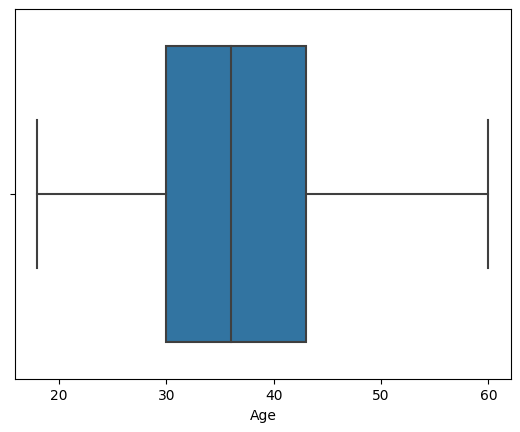

In [ ]:
sns.boxplot(x = df['Age'])
plt.show()

**Observation:** This confirms our previous inference as there are no outliers

**Question??** If age distribution same for both the genders

In [ ]:
r1 = df.groupby('Gender')['Age'].mean().reset_index()
r1

,Gender,Age
0,Female,37.329932
1,Male,36.653061


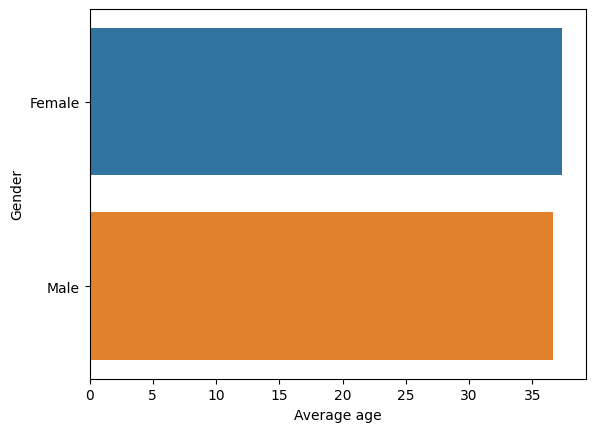

In [ ]:
sns.barplot(data = r1, y = 'Gender', x = 'Age')
plt.xlabel('Average age')
plt.show()

**Observation:** Average age of male and females is almost the same though female age is marginally greater

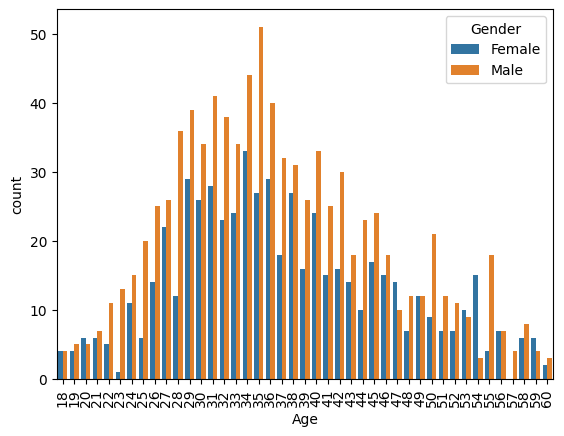

In [ ]:
sns.countplot(data = df, x = 'Age', hue = 'Gender')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

**Observation:** There are mpre male employees than female employees

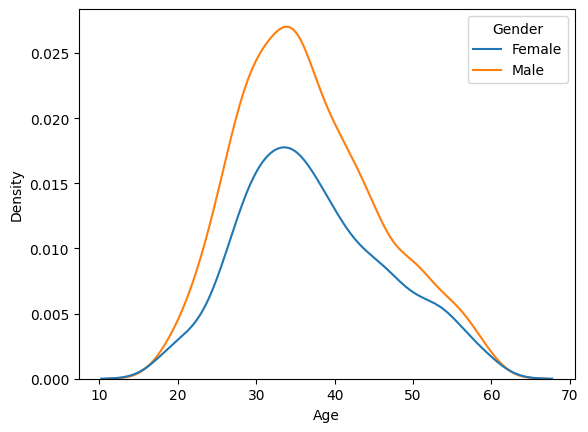

In [ ]:
sns.kdeplot(data = df, x = 'Age', hue = 'Gender')
plt.show()

**Observation:** There is no significant difference between age of male and female employees.<br>

Lets see if age has any reation with attrition rate

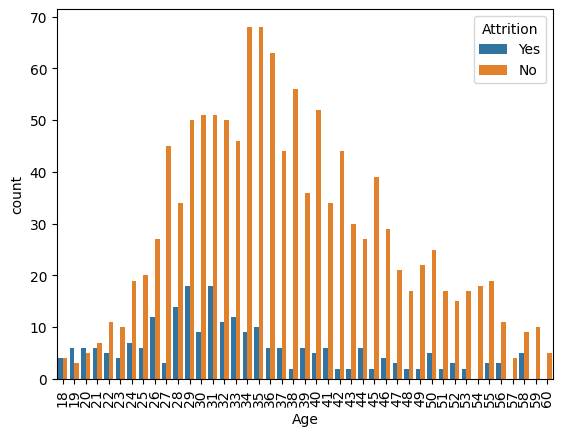

In [ ]:
sns.countplot(data = df, x = 'Age', hue = 'Attrition')
plt.xticks(rotation = 90)
plt.show()

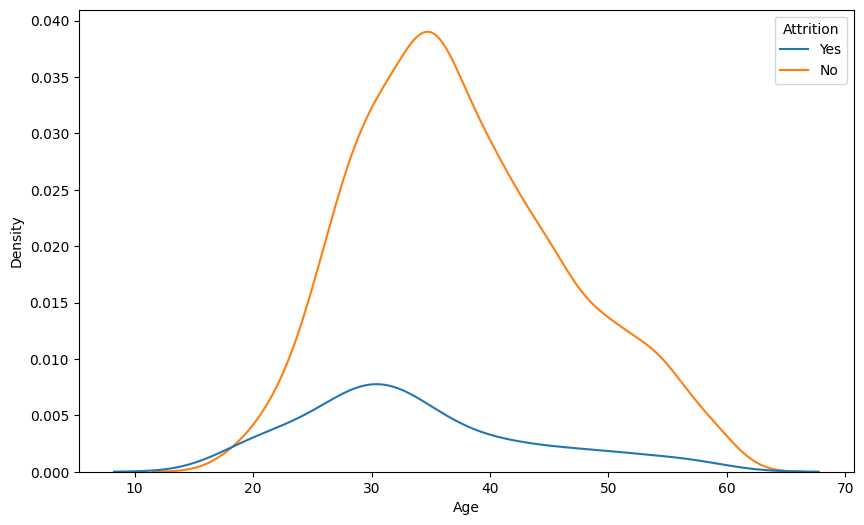

In [ ]:
plt.figure(figsize = (10, 6))

sns.kdeplot(data = df, x = 'Age', hue = 'Attrition')

plt.show()

**Observation:** Yonger employees are more likley to leave than older employees

**Attrition**

In [ ]:
attrition_count = df['Attrition'].value_counts().reset_index()
attrition_count.colums = ['Attrition', 'Count']
attrition_count

,index,Attrition
0,No,1233
1,Yes,237


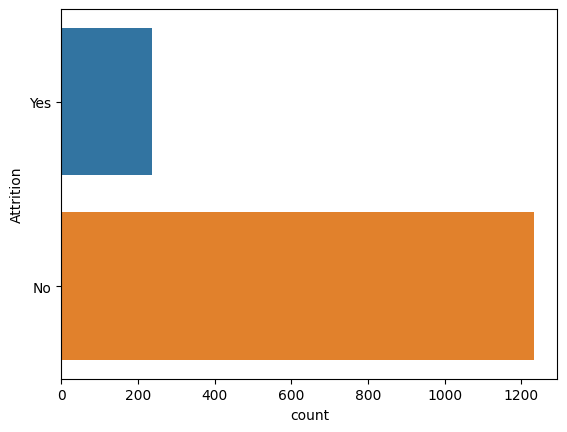

In [ ]:
sns.countplot(data = df, y = 'Attrition')
plt.show()

**Observation:** Very clearly far greater number of employee chose to stay than the number of employees leaving the company

**Question??** Is attrition same for both males and females

**Business Travel**

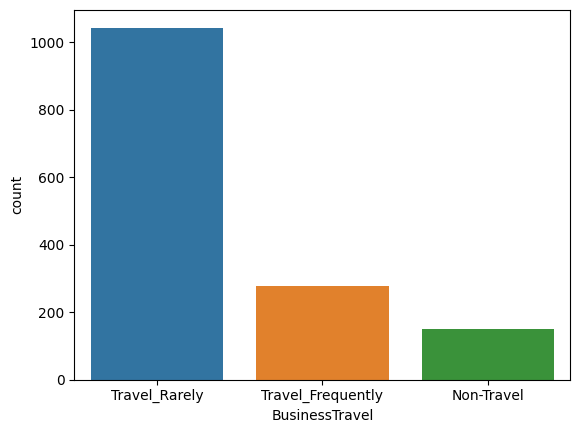

In [ ]:
sns.countplot(data = df, x = 'BusinessTravel')
plt.show()

**Observation:** Most employees either travel_rarely or do not travel at all

Let's see relation between travel and attrition

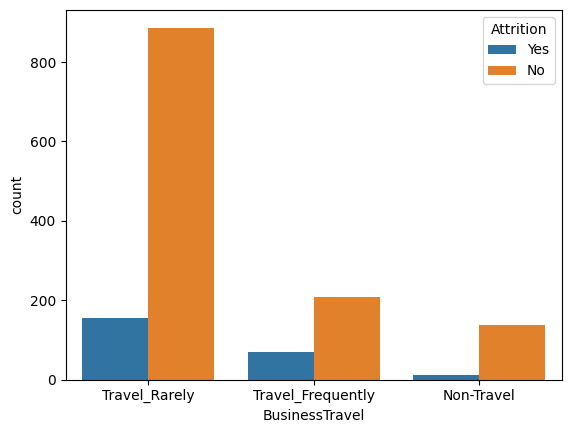

In [ ]:
sns.countplot(data = df, x = 'BusinessTravel', hue = 'Attrition')
plt.show()

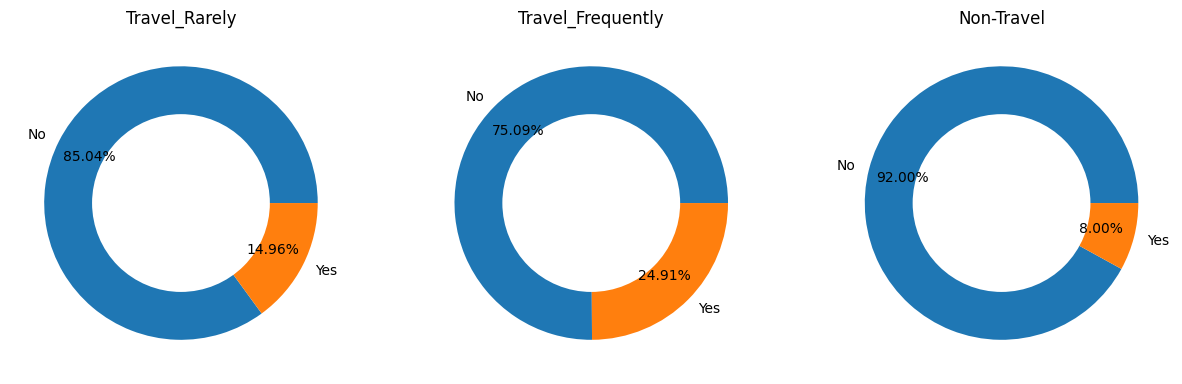

In [ ]:
plt.figure(figsize = (15, 6))

for i in range(1, df['BusinessTravel'].nunique() + 1):
  fig = plt.subplot(1,3,i)
  plt.pie(df[df['BusinessTravel'] == df['BusinessTravel'].unique()[i-1]]['Attrition'].value_counts().values,
          labels = df['Attrition'].value_counts().index,
          autopct = '%.2f%%',
          pctdistance=0.75)
  centre_circle = plt.Circle((0, 0), 0.650, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.title(df['BusinessTravel'].unique()[i-1])
plt.show()

**Observation:** Employees that are frequent travelers have greater percentage of leaving organization

**Department**

In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

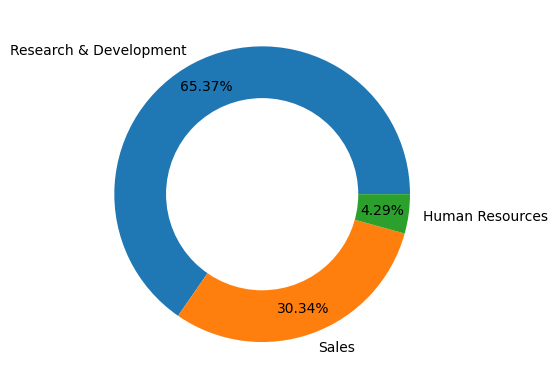

In [ ]:
plt.pie(df['Department'].value_counts().values, labels = df['Department'].value_counts().index, autopct = '%0.2f%%', pctdistance = 0.82)
centre_circle = plt.Circle((0, 0), 0.650, fc='white')
plt.gcf()
plt.gca().add_artist(centre_circle)
plt.show()

**observation:** Most employees work in either R&D or Sales

**Question??** Which department has highest attrition rate??

In [ ]:
depart_attr = df.groupby(['Department', 'Attrition'])['EmployeeNumber'].count().reset_index()
depart_attr

,Department,Attrition,EmployeeNumber
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [ ]:
depart_attr['%'] = [100 * depart_attr.iloc[i, 2] / depart_attr[depart_attr['Department'] == depart_attr.iloc[i, 0]]['EmployeeNumber'].sum() for i in range(0, depart_attr.shape[0])]

In [ ]:
depart_attr

,Department,Attrition,EmployeeNumber,%
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


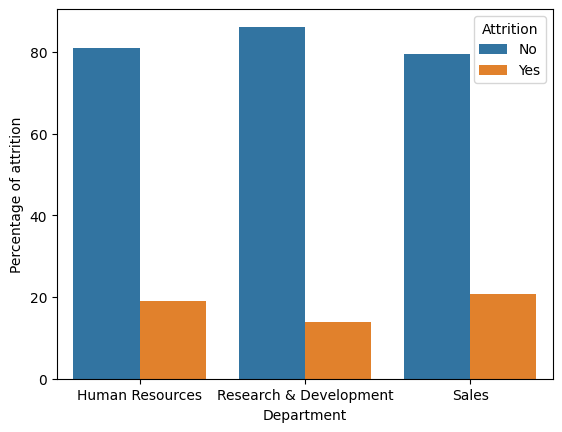

In [ ]:
sns.barplot(data = depart_attr, x = 'Department', y = '%', hue = 'Attrition')
plt.ylabel('Percentage of attrition')
plt.show()

**observation:** Sales department has highest rate of attrition

**DistanceFromHome**
First of all lets examine the distribution of distance from home

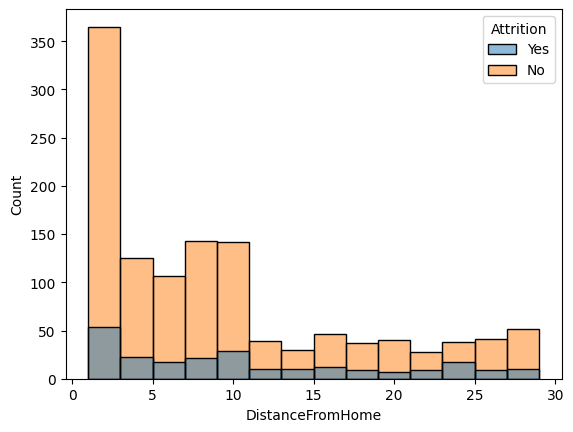

In [ ]:
sns.histplot(data = df, x = 'DistanceFromHome', hue = 'Attrition')
plt.show()

**observation:** More employee live closer to home and there is no clear relation between attrition and distance from home

**Education**

1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

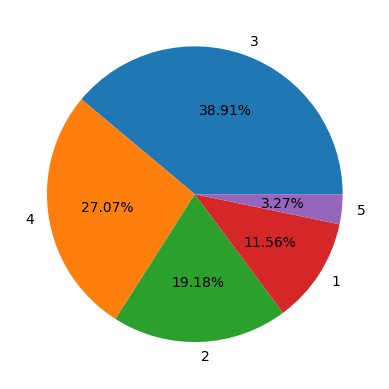

In [ ]:
plt.pie(df['Education'].value_counts().values, labels = df['Education'].value_counts().index, autopct = '%.2f%%')
plt.show()

**observation:**
Most employees are having either bachelor or master level education <br>
**question??**
Is there any relation between education and attrition

In [ ]:
edu_attr = df.groupby(['Education', 'Attrition'])['EmployeeNumber'].count().reset_index()
edu_attr

,Education,Attrition,EmployeeNumber
0,1,No,139
1,1,Yes,31
2,2,No,238
3,2,Yes,44
4,3,No,473
5,3,Yes,99
6,4,No,340
7,4,Yes,58
8,5,No,43
9,5,Yes,5


In [ ]:
edu_attr['%'] = [round(100 * edu_attr.iloc[i, 2] / edu_attr[edu_attr['Education'] == edu_attr.iloc[i, 0]]['EmployeeNumber'].sum(), 2) for i in range(0, edu_attr.shape[0])]


In [ ]:
edu_attr

,Education,Attrition,EmployeeNumber,%
0,1,No,139,81.76
1,1,Yes,31,18.24
2,2,No,238,84.40
3,2,Yes,44,15.60
4,3,No,473,82.69
5,3,Yes,99,17.31
6,4,No,340,85.43
7,4,Yes,58,14.57
8,5,No,43,89.58
9,5,Yes,5,10.42


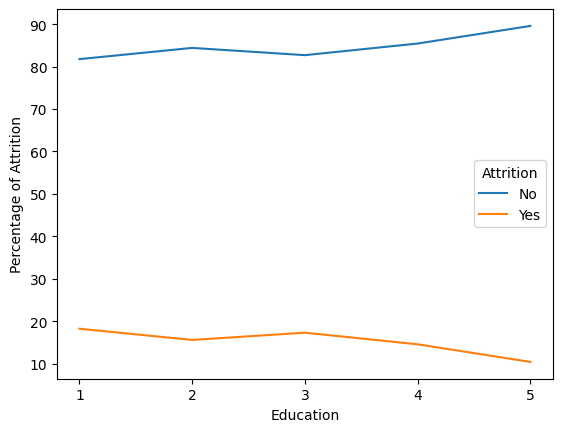

In [ ]:
sns.lineplot(data = edu_attr, x = 'Education', y = '%', hue = 'Attrition')
plt.ylabel('Percentage of Attrition')
plt.xticks([1,2,3,4,5])
plt.show()

**observation:** Clearly attrition goes down as the education level increases

**EducationField**

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

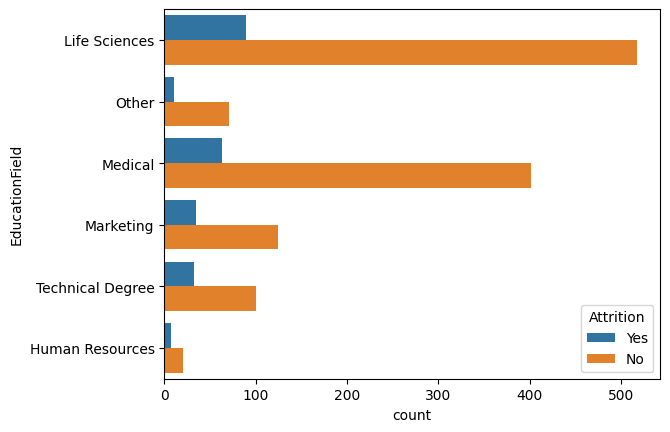

In [ ]:
sns.countplot(data = df, y = 'EducationField', hue = 'Attrition')
plt.show()

**question??** Is there any relation between EducationField and attrition

In [ ]:
edufield_attr = df.groupby(['EducationField', 'Attrition'])['EmployeeNumber'].count().reset_index()
edufield_attr

,EducationField,Attrition,EmployeeNumber
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


In [ ]:
edufield_attr['%'] = [round(100 * edufield_attr.iloc[i, 2] / edufield_attr[edufield_attr['EducationField'] == edufield_attr.iloc[i,0]]['EmployeeNumber'].sum(), 2) for i in range(edufield_attr.shape[0])]

In [ ]:
edufield_attr

,EducationField,Attrition,EmployeeNumber,%
0,Human Resources,No,20,74.07
1,Human Resources,Yes,7,25.93
2,Life Sciences,No,517,85.31
3,Life Sciences,Yes,89,14.69
4,Marketing,No,124,77.99
5,Marketing,Yes,35,22.01
6,Medical,No,401,86.42
7,Medical,Yes,63,13.58
8,Other,No,71,86.59
9,Other,Yes,11,13.41


**observation:** HR department is having 25.93% attrition rate

**EnvironmentSatisfaction**

In [ ]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

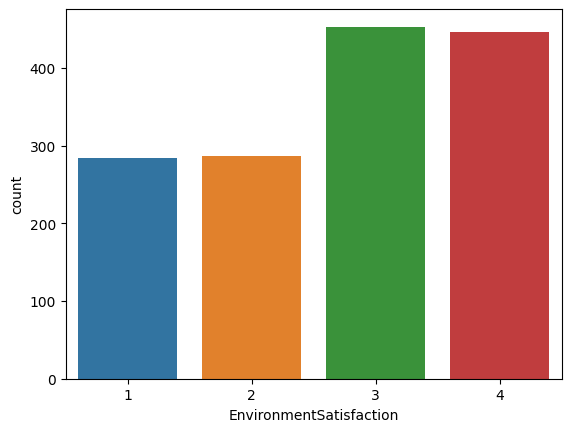

In [ ]:
sns.countplot(data = df, x = 'EnvironmentSatisfaction')
plt.show()

**question??** Is there any relation between environment satisfaction and attrition

In [ ]:
env_sat_attr = df.groupby(['EnvironmentSatisfaction', 'Attrition'])['EmployeeNumber'].count().reset_index()
env_sat_attr

,EnvironmentSatisfaction,Attrition,EmployeeNumber
0,1,No,212
1,1,Yes,72
2,2,No,244
3,2,Yes,43
4,3,No,391
5,3,Yes,62
6,4,No,386
7,4,Yes,60


In [ ]:
env_sat_attr['%'] = [round(100 * env_sat_attr.iloc[i, 2] / env_sat_attr[env_sat_attr['EnvironmentSatisfaction'] == env_sat_attr.iloc[i, 0]]['EmployeeNumber'].sum(), 2) for i in range(env_sat_attr.shape[0])]

In [ ]:
env_sat_attr

,EnvironmentSatisfaction,Attrition,EmployeeNumber,%
0,1,No,212,74.65
1,1,Yes,72,25.35
2,2,No,244,85.02
3,2,Yes,43,14.98
4,3,No,391,86.31
5,3,Yes,62,13.69
6,4,No,386,86.55
7,4,Yes,60,13.45


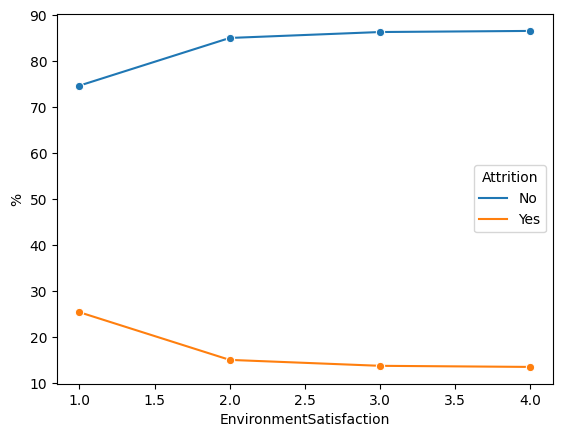

In [ ]:
sns.lineplot(data = env_sat_attr, x = 'EnvironmentSatisfaction', y = '%', marker = 'o', hue = 'Attrition')
plt.show()

**observation** It is obvious that as environment satisfaction increases attrition rate decreases<br>

**Gender**

In [ ]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

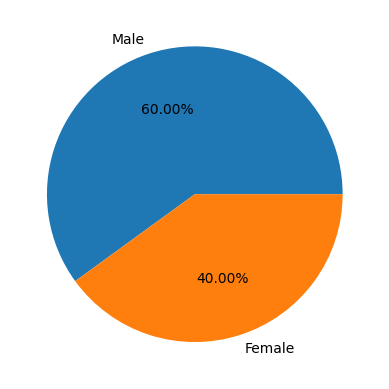

In [ ]:
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct='%.2f%%')
plt.show()

**observation** Majority of employees are male

Lets examine relation between Gender ans Attrition

In [ ]:
gender_attr = df.groupby(['Gender', 'Attrition'])['EmployeeNumber'].count().reset_index()
gender_attr

,Gender,Attrition,EmployeeNumber
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [ ]:
gender_attr['%'] = [round(100 * gender_attr.iloc[i, 2] / gender_attr[gender_attr['Gender'] == gender_attr.iloc[i, 0]]['EmployeeNumber'].sum(), 2) for i in range(0, gender_attr.shape[0])]

In [ ]:
gender_attr

,Gender,Attrition,EmployeeNumber,%
0,Female,No,501,85.20
1,Female,Yes,87,14.80
2,Male,No,732,82.99
3,Male,Yes,150,17.01


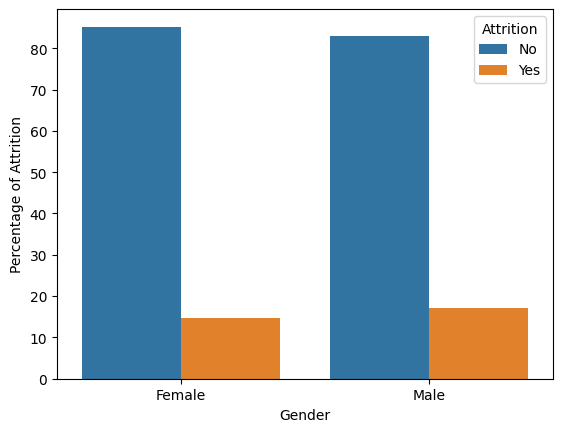

In [ ]:
sns.barplot(data = gender_attr, x = 'Gender', y = '%', hue = 'Attrition')
plt.ylabel('Percentage of Attrition')
plt.show()

**observation** Rate of attrition same in both male and female employess though rate is attrition is marginally higher

**JobInvolvement**

1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'



In [ ]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

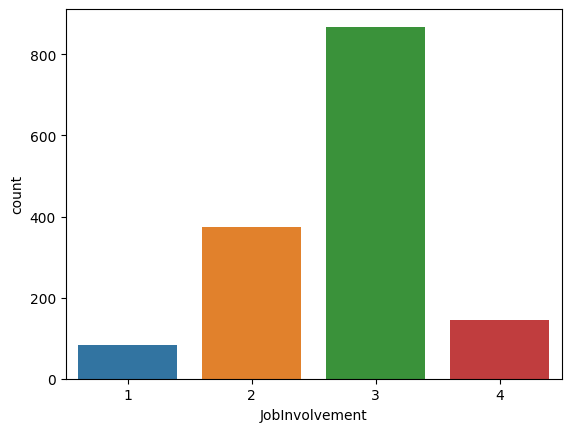

In [ ]:
sns.countplot(data = df, x = 'JobInvolvement')
plt.show()

**observatio:** Most employees show high level of job involvemet

**question??** Lets examine relation between job involvement and attrtion level

In [ ]:
job_envol_attr = df.groupby(['JobInvolvement', 'Attrition'])['EmployeeNumber'].count().reset_index()
job_envol_attr

,JobInvolvement,Attrition,EmployeeNumber
0,1,No,55
1,1,Yes,28
2,2,No,304
3,2,Yes,71
4,3,No,743
5,3,Yes,125
6,4,No,131
7,4,Yes,13


In [ ]:
job_envol_attr['%'] = [round(100 * job_envol_attr.iloc[i, 2] / job_envol_attr[job_envol_attr['JobInvolvement'] == job_envol_attr.iloc[i,0]]['EmployeeNumber'].sum(), 2) for i in range(0, job_envol_attr.shape[0])]

In [ ]:
job_envol_attr

,JobInvolvement,Attrition,EmployeeNumber,%
0,1,No,55,66.27
1,1,Yes,28,33.73
2,2,No,304,81.07
3,2,Yes,71,18.93
4,3,No,743,85.60
5,3,Yes,125,14.40
6,4,No,131,90.97
7,4,Yes,13,9.03


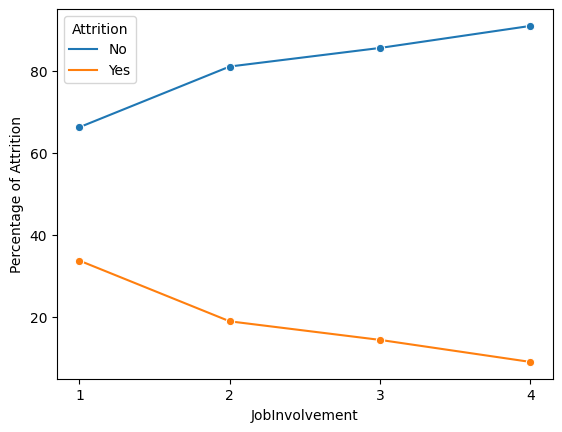

In [ ]:
sns.lineplot(data = job_envol_attr, x = 'JobInvolvement', y = '%', hue = 'Attrition', marker = 'o')
plt.ylabel('Percentage of Attrition')
plt.xticks([1,2,3,4])
plt.show()

**observation** Very clearly as job involvemnt goes up the rate attrition deceases <br>
**JobLevel**

In [ ]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

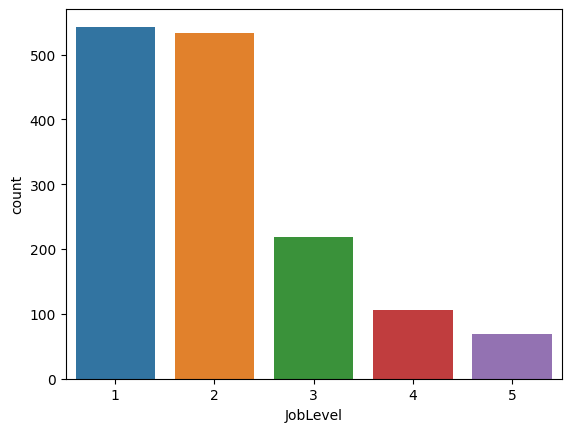

In [ ]:
sns.countplot(data = df, x = 'JobLevel')
plt.show()

**question??** Is there any relation between JobLevel and attrition

In [ ]:
joblevel_attr = df.groupby(['JobLevel', 'Attrition'])['EmployeeNumber'].count().reset_index()

In [ ]:
joblevel_attr

,JobLevel,Attrition,EmployeeNumber
0,1,No,400
1,1,Yes,143
2,2,No,482
3,2,Yes,52
4,3,No,186
5,3,Yes,32
6,4,No,101
7,4,Yes,5
8,5,No,64
9,5,Yes,5


In [ ]:
joblevel_attr['%'] = [round(100 * joblevel_attr.iloc[i, 2] / joblevel_attr[joblevel_attr['JobLevel'] == joblevel_attr.iloc[i,0]]['EmployeeNumber'].sum(), 2) for i in range(0, joblevel_attr.shape[0])]

In [ ]:
joblevel_attr

,JobLevel,Attrition,EmployeeNumber,%
0,1,No,400,73.66
1,1,Yes,143,26.34
2,2,No,482,90.26
3,2,Yes,52,9.74
4,3,No,186,85.32
5,3,Yes,32,14.68
6,4,No,101,95.28
7,4,Yes,5,4.72
8,5,No,64,92.75
9,5,Yes,5,7.25


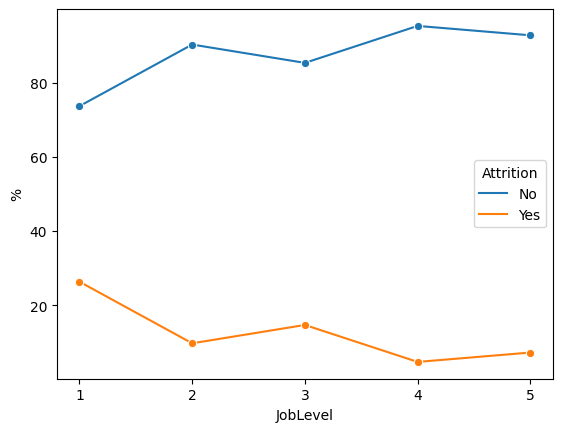

In [ ]:
sns.lineplot(data = joblevel_attr, x = 'JobLevel', y = '%', hue = 'Attrition', marker = 'o')
plt.xticks([1,2,3,4,5])
plt.show()

**observation** Attrition is highest for job level 1

**JobRole**

In [ ]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

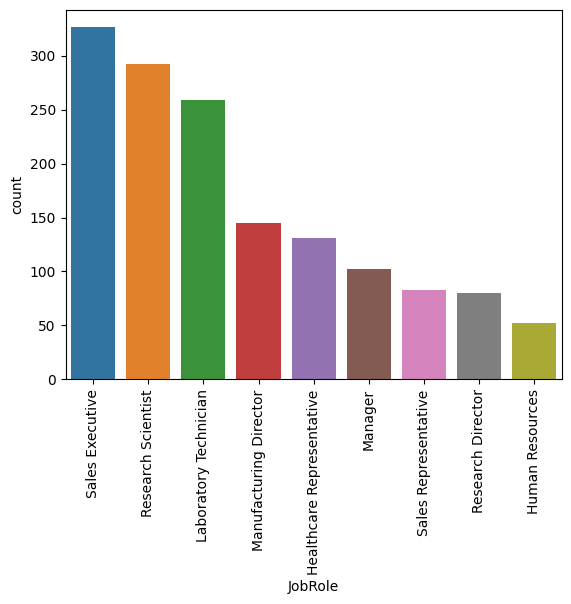

In [ ]:
sns.countplot(data = df, x = 'JobRole')
plt.xticks(rotation = 90)
plt.show()

**JobSatisfaction**

1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

In [ ]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [ ]:
job_sats_attr = df.groupby(['JobSatisfaction', 'Attrition'])['EmployeeNumber'].count().reset_index()

In [ ]:
job_sats_attr

,JobSatisfaction,Attrition,EmployeeNumber
0,1,No,223
1,1,Yes,66
2,2,No,234
3,2,Yes,46
4,3,No,369
5,3,Yes,73
6,4,No,407
7,4,Yes,52


In [ ]:
job_sats_attr['%'] = [round(100 * job_sats_attr.iloc[i, 2] / job_sats_attr[job_sats_attr['JobSatisfaction'] == job_sats_attr.iloc[i,0]]['EmployeeNumber'].sum(),2) for i in range(0, job_sats_attr.shape[0])]

In [ ]:
job_sats_attr

,JobSatisfaction,Attrition,EmployeeNumber,%
0,1,No,223,77.16
1,1,Yes,66,22.84
2,2,No,234,83.57
3,2,Yes,46,16.43
4,3,No,369,83.48
5,3,Yes,73,16.52
6,4,No,407,88.67
7,4,Yes,52,11.33


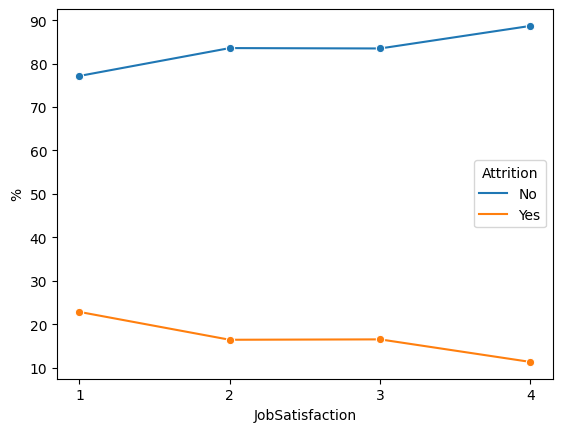

In [ ]:
sns.lineplot(data = job_sats_attr, x = 'JobSatisfaction', y = '%', hue = 'Attrition', marker = 'o')
plt.xticks([1,2,3,4])
plt.show()

**MonthlyIncome**

Lets examine the distribution of monthly income

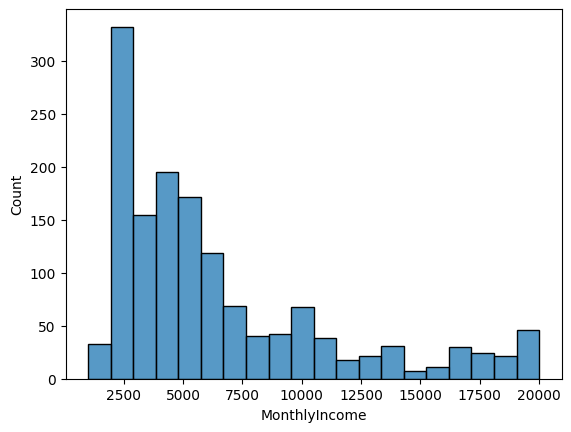

In [ ]:
sns.histplot(data = df, x = 'MonthlyIncome')
plt.show()

**observation** Clearly more employees are having lower income

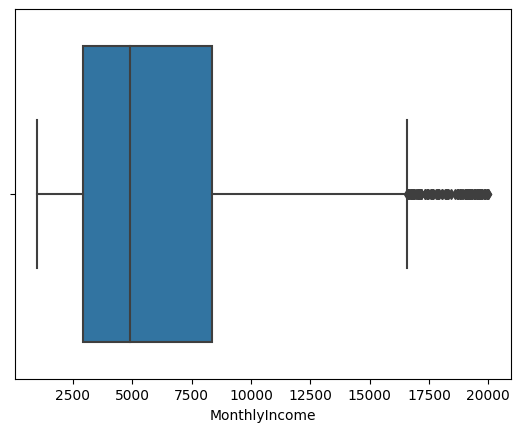

In [ ]:
sns.boxplot(data = df, x = 'MonthlyIncome')
plt.show()

**observation** There are outliers on the higher income side

In [ ]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

lets make 4 income group based on income
1. low
2. medium
3. high
4. very high

In [ ]:
df['IncomeGroup'] = pd.cut(x = df['MonthlyIncome'], bins = [1000, 5000, 10000, 15000, 20000], labels = [1, 2, 3, 4])

In [ ]:
df['IncomeGroup'].value_counts()

1    749
2    440
3    148
4    133
Name: IncomeGroup, dtype: int64

**question??** Is there any relation between income and attrition

In [ ]:
income_attr = df.groupby(['IncomeGroup', 'Attrition'])['EmployeeNumber'].count().reset_index()
income_attr

,IncomeGroup,Attrition,EmployeeNumber
0,1,No,586
1,1,Yes,163
2,2,No,391
3,2,Yes,49
4,3,No,128
5,3,Yes,20
6,4,No,128
7,4,Yes,5


In [ ]:
income_attr['%'] = [round(100 * income_attr.iloc[i, 2] / income_attr[income_attr['IncomeGroup'] == income_attr.iloc[i,0]]['EmployeeNumber'].sum(), 2)
for i in range(0, income_attr.shape[0])]

In [ ]:
income_attr

,IncomeGroup,Attrition,EmployeeNumber,%
0,1,No,586,78.24
1,1,Yes,163,21.76
2,2,No,391,88.86
3,2,Yes,49,11.14
4,3,No,128,86.49
5,3,Yes,20,13.51
6,4,No,128,96.24
7,4,Yes,5,3.76


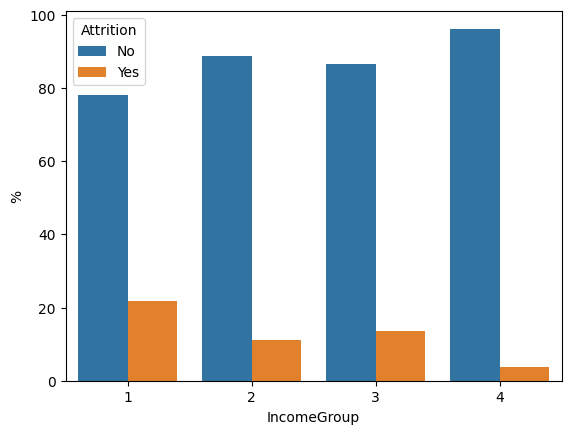

In [ ]:
sns.barplot(data = income_attr, x = 'IncomeGroup', y = '%', hue = 'Attrition')
plt.show()

**observation** As income increases attrition rate decreases

**NumCompaniesWorked**

lets check distribution of number of companies worked

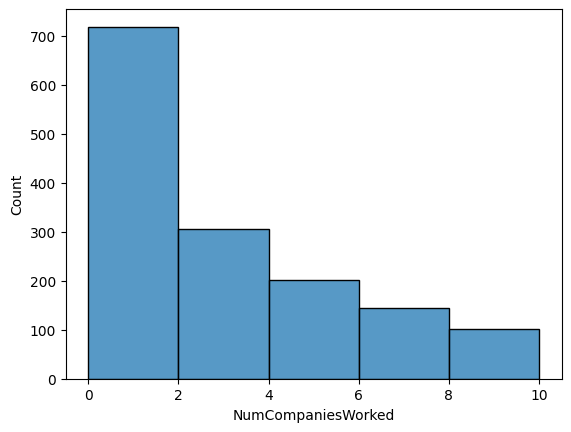

In [ ]:
sns.histplot(data = df, x = 'NumCompaniesWorked', bins = [0,2,4,6,8,10])
plt.show()

**observation** Clearly most employees have only worked in 0-2 number of companies

**question??** Is there relation between number of companies worked and attrition

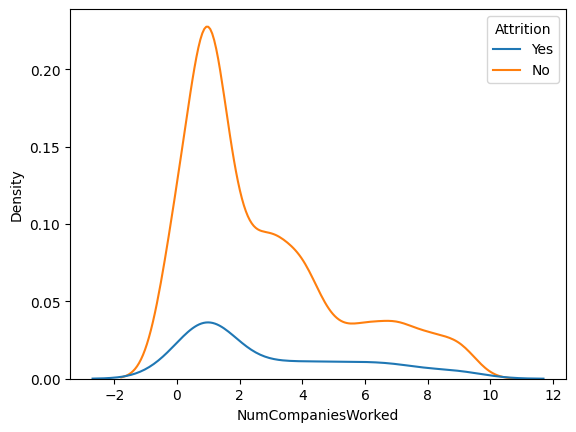

In [ ]:
sns.kdeplot(data = df, x = 'NumCompaniesWorked', hue = 'Attrition')
plt.show()

**observation** Employees who have worked less number of companies are more likely to leave

**OverTime**

In [ ]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

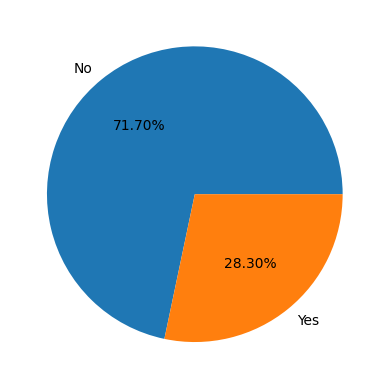

In [ ]:
plt.pie(df['OverTime'].value_counts().values, labels = df['OverTime'].value_counts().index, autopct = '%.2f%%')
plt.show()

**observation** 28.30% of employees over work

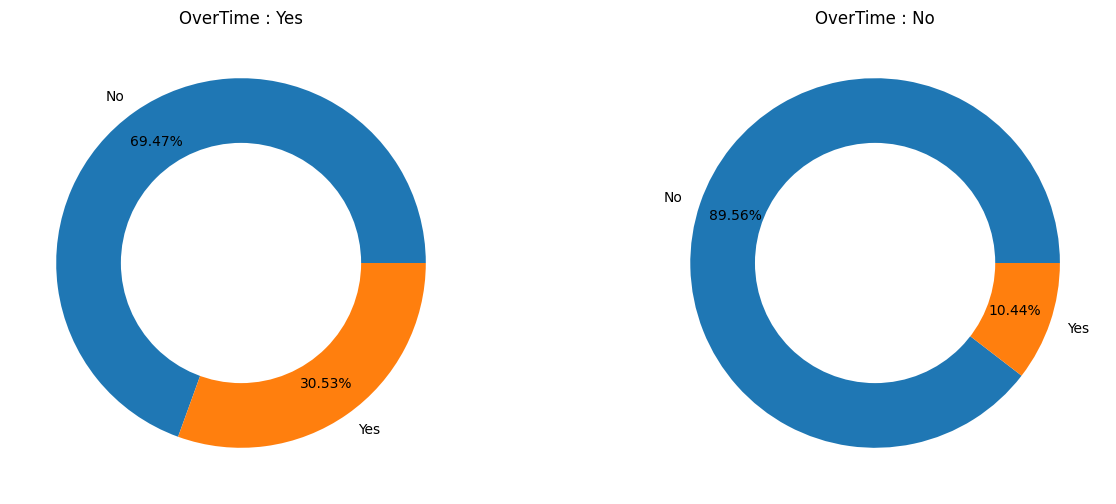

In [ ]:
plt.figure(figsize = (15, 6))

# df[df['BusinessTravel'] == df['BusinessTravel'].unique()[i-1]]['Attrition'].value_counts().values

for i in range(0, df['OverTime'].nunique()):
  plt.subplot(1,df['OverTime'].nunique(),i+1)
  plt.pie(df[df['OverTime'] == df['OverTime'].unique()[i]]['Attrition'].value_counts().values,
          labels = df['Attrition'].value_counts().index,
          autopct = '%.2f%%',
          pctdistance = 0.80)
  centre_circle = plt.Circle((0, 0), 0.650, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.title(f'OverTime : {df["OverTime"].unique()[i]}')


**observation** Attrition rate in employees who over work in 30.53% as compared to 10.44% in employees who don't over work

**PercentSalaryHike**

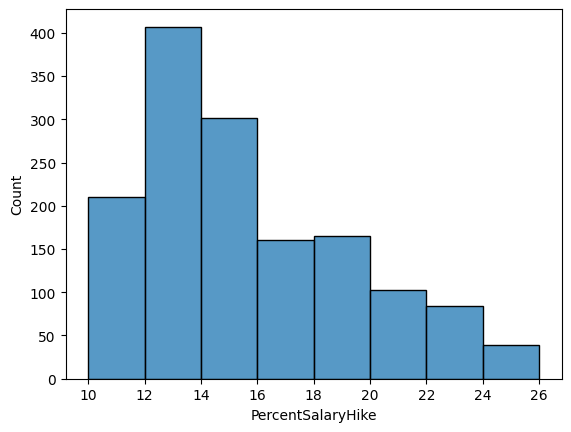

In [ ]:
sns.histplot(df['PercentSalaryHike'], bins = [10,12,14,16,18,20,22,24,26])
plt.show()

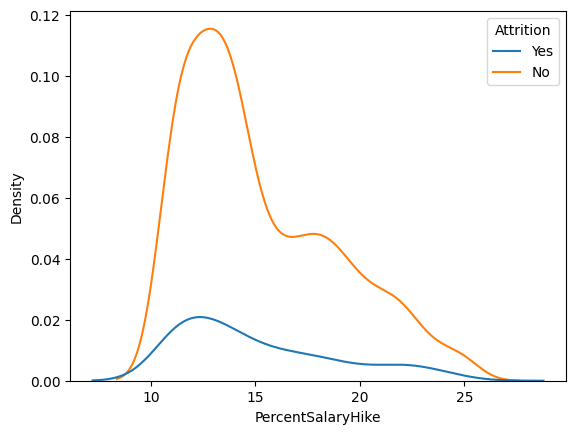

In [ ]:
sns.kdeplot(data = df, x = 'PercentSalaryHike', hue = 'Attrition')
plt.show()

**onservation** Attrition goes down as percent salary hike increases

**WorkLifeBalance**

1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

In [ ]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

**question??** Is there any relation between work life balance and attrition

In [221]:
wlb_attr = df.groupby(['WorkLifeBalance', 'Attrition'])['EmployeeNumber'].count().reset_index()

In [222]:
wlb_attr

,WorkLifeBalance,Attrition,EmployeeNumber
0,1,No,55
1,1,Yes,25
2,2,No,286
3,2,Yes,58
4,3,No,766
5,3,Yes,127
6,4,No,126
7,4,Yes,27


In [223]:
wlb_attr['%'] = [round(100 * wlb_attr.iloc[i, 2] / wlb_attr[wlb_attr['WorkLifeBalance'] == wlb_attr.iloc[i,0]]['EmployeeNumber'].sum(),2)
for i in range(0, wlb_attr.shape[0])]

In [224]:
wlb_attr

,WorkLifeBalance,Attrition,EmployeeNumber,%
0,1,No,55,68.75
1,1,Yes,25,31.25
2,2,No,286,83.14
3,2,Yes,58,16.86
4,3,No,766,85.78
5,3,Yes,127,14.22
6,4,No,126,82.35
7,4,Yes,27,17.65


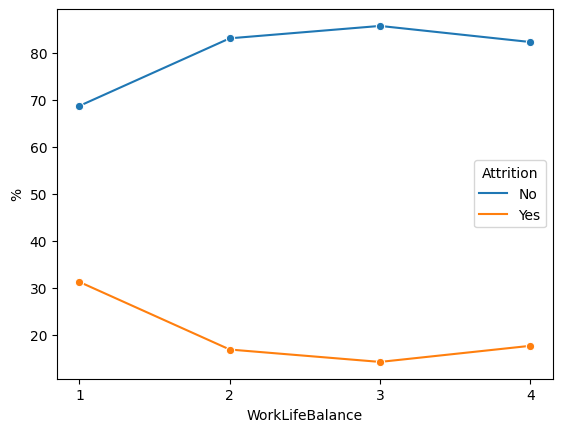

In [226]:
sns.lineplot(data = wlb_attr, x = 'WorkLifeBalance', y = '%', hue = 'Attrition', marker = 'o')
plt.xticks([1,2,3,4])
plt.show()

**observation** As expected attrition is over 30% inn employees having poor work life balance